<a href="https://colab.research.google.com/github/bhavi289/Eminem-Lyrics-Generator/blob/master/Eminem_Rap_Generator_(Word_Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install unidecode

     |████████████████████████████████| 245kB 3.4MB/s 


In [3]:
from __future__ import print_function
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop, Adam
from keras.utils.data_utils import get_file
import numpy as np
import pandas as pd
import random
import sys
import io
import re
from unidecode import unidecode

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# !ls drive/My\ Drive
dataset_path = "drive/My Drive/Eminem Rap Lyrics Generator Dataset/"

In [0]:
songs = pd.read_csv(dataset_path + 'eminem-songs.csv')

In [0]:
def get_tokenized_lines(df):
    words = []
    
    for index, row in df['lyrics'].iteritems():
        row = str(row).lower()
        for line in row.split('|-|'):
            new_words = re.findall(r"\b[a-z']+\b", unidecode(line))
            words = words + new_words
        
    return words

In [0]:
all_lyric_lines = get_tokenized_lines(songs)

In [31]:
SEQ_LENGTH = 50 + 1
sequences = list()

for i in range(SEQ_LENGTH, len(all_lyric_lines)):
    seq = all_lyric_lines[i - SEQ_LENGTH: i]
    sequences.append(seq)

print('Total Sequences: %d' % len(sequences))

Total Sequences: 11153


In [0]:
def save_doc(lines, filename):
    for line in lines:
        data = ' '.join(line)
        
    '\n'.join(data)
    file = open(filename, 'w') ## 'a'?
    file.write(data)
    file.close()

In [0]:
out_filename = dataset_path + 'sequences.txt'
save_doc(sequences, out_filename)

In [34]:
vocab = set(all_lyric_lines)

word_to_index = {w: i for i, w in enumerate(vocab)}
index_to_word = {i: w for w, i in word_to_index.items()}
word_indices = [word_to_index[word] for word in vocab]
vocab_size = len(vocab)

print('vocabulary size: {}'.format(vocab_size))

vocabulary size: 2149


In [0]:
def get_tokenized_lines(lines, seq_len):
    tokenized = np.zeros((len(lines), seq_len))
    
    for r, line in enumerate(lines):
        for c, word in enumerate(line):
            tokenized[r, c] = word_to_index[word]

    return tokenized

In [0]:
tokenized_seq = get_tokenized_lines(sequences, SEQ_LENGTH)

In [41]:
tokenized_seq[:, -1].shape

(11153,)

In [0]:
from keras.utils import to_categorical

X, y = tokenized_seq[:, :-1], tokenized_seq[:, -1]
y = to_categorical(y, num_classes=vocab_size)
seq_length = len(X[0])

In [49]:
print("X_shape", X.shape)
print("y_shape", y.shape)

X_shape (11153, 50)
y_shape (11153, 2149)


In [50]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding

model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=seq_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())



Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 50)            107450    
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 100)           60400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 2149)              217049    
Total params: 475,399
Trainable params: 475,399
Non-trainable params: 0
_________________________________________________________________
None


In [51]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, batch_size=128, epochs=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
11153/11153 [==============================] - 17s 2ms/step - loss: 6.6287 - acc: 0.0349
Epoch 2/50
11153/11153 [==============================] - 14s 1ms/step - loss: 6.1890 - acc: 0.0385
Epoch 3/50
11153/11153 [==============================] - 14s 1ms/step - loss: 6.1671 - acc: 0.0401
Epoch 4/50
11153/11153 [==============================] - 16s 1ms/step - loss: 6.0793 - acc: 0.0397
Epoch 5/50
11153/11153 [==============================] - 14s 1ms/step - loss: 5.9286 - acc: 0.0412
Epoch 6/50
11153/11153 [==============================] - 14s 1ms/step - loss: 5.7860 - acc: 0.0440
Epoch 7/50
11153/11153 [==============================] - 14s 1ms/step - loss: 5.6829 - acc: 0.0473
Epoch 8/50
11153/11153 [==============================] - 14s 1ms/step - loss: 5.5859 - acc: 0.0525
Epoch 9/50
11153/11153 [==============================] - 14s 1ms/step - loss: 5.4988 - acc: 0.0536
Epoch 10/50
11153/11153 [===========================

In [0]:
import matplotlib.pyplot as plt

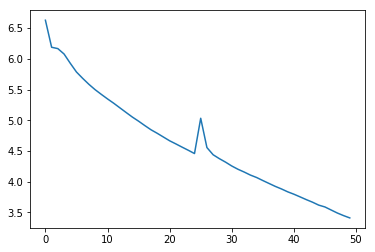

In [53]:
plt.plot(history.history['loss'])

In [0]:
model.save('model.h5')
drive/My Drive/Eminem Rap Lyrics Generator Dataset/

In [0]:
!cp model.h5 drive/My\ Drive/Eminem\ Rap\ Lyrics\ Generator\ Dataset/

In [59]:
!ls drive/My\ Drive/Eminem\ Rap\ Lyrics\ Generator\ Dataset/

eminem-songs.csv  model.h5  sequences.txt


In [63]:
!ls

drive  model.h5  sample_data  sequences.txt


In [0]:
from keras.models import load_model

model = load_model('model.h5')

In [0]:
def load_doc(filename):
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text

In [0]:
# load cleaned text sequences
in_filename = 'sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')
seq_length = SEQ_LENGTH - 1

In [65]:
from random import randint

seed_text = lines[randint(0,len(lines))]
print(seed_text + '\n')

key in the door and bodies layin all over the floor and i don't remember how they got there but i guess i must've killed em killed em yo yo ayo evil rise yo yo ayo evil rise yo yo ayo evil rise yo yo ayo evil rise evil rise evil



In [0]:
def texts_to_sequences(texts, word_to_index):
    indices = np.zeros((1, len(texts)), dtype=int)
    
    for i, text in enumerate(texts):
        indices[:, i] = word_to_index[text]
        
    return indices

In [0]:
def my_pad_sequences(seq, maxlen):
    start = seq.shape[1] - maxlen
    
    return seq[:, start: start + maxlen]

In [0]:
def generate_seq(model, word_to_index, seq_length, seed_text, n_words):
    result = list()
    in_text = seed_text

    for _ in range(n_words):
        encoded = texts_to_sequences(in_text.split()[1:], word_to_index)
        encoded = my_pad_sequences(encoded, maxlen=seq_length)
        
        yhat = model.predict_classes(encoded, verbose=0)
        out_word = ''
    
        for word, index in word_to_index.items():
            if index == yhat:
                out_word = word
                break
        
        in_text += ' ' + out_word
        result.append(out_word)
        
    return ' '.join(result)

In [70]:
generated = generate_seq(model, word_to_index, seq_length, seed_text, 50)
print(generated)

rise until the key and a rip with a father or young do a ago and wondering your fuck of the times are o me this reason and stapled a opportunity are chainsaw this reserved a bath are o when the life and vodka the chance the news everyday i
